# Курс доллара США по отношению к гривне

Офіційний курс валют Національного банку України.

Источник данных: https://bank.gov.ua/control/uk/curmetal/currency/search/form/period

---

**Содержание**

1. [Данные для анализа](#Данные-для-анализа)
2. [Подготовка к работе](#Подготовка-к-работе)
3. [Загрузка и фильтрация данных](#Загрузка-и-фильтрация-данных)
4. [Визуализация данных](#Визуализация_данных)
5. [Скользящее среднее](#Скользящее_среднее)
6. [Дополнение](#Дополнение)

## Данные для анализа

Файл с данными `data/nbu_usd.xls` имеет следующую структуру.

|   Назва валюти  |    Дата    |  Час  | Кількість одиниць | Офіційний курс |
|-----------------|------------|-------|-------------------|----------------|
| Долар США (USD) | 06.01.1996 | 00.00 | 1                 | 179900         |
| Долар США (USD) | 12.01.1996 | 00.00 | 1                 | 181300         |
| Долар США (USD) | 13.01.1996 | 00.00 | 1                 | 181800         |
| Долар США (USD) | 16.01.1996 | 00.00 | 1                 | 182300         |
| Долар США (USD) | 17.01.1996 | 00.00 | 1                 | 182800         |
| ...             | ...        | ...   | ...               | ...            |
| Долар США (USD) | 12.02.2019 | 00.00 | 100               | 2705.7716      |
| Долар США (USD) | 13.02.2019 | 00.00 | 100               | 2700.7494      |
| Долар США (USD) | 14.02.2019 | 00.00 | 100               | 2709.2791      |
| Долар США (USD) | 15.02.2019 | 00.00 | 100               | 2715.9961      |
| Долар США (USD) | 18.02.2019 | 00.00 | 100               | 2724.7894      |


In [6]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from matplotlib import pyplot as plt

In [7]:
%config InlineBackend.figure_format = 'svg'
pd.options.display.max_rows = 10
plt.rc('figure', figsize=(10, 6))

## Загрузка и фильтрация данных

Файл `data/nbu_usd.xls` можно загрузить при помощи функции `pd.read_excel`.

In [8]:
data_raw = pd.read_excel('data/nbu_usd.xls')

### Работа со временем

После загрузки из файла значения наших столбцов `Дата` и `Час` имеют строковый тип. Для эффективной работы с временным рядом нужно преобразовать эти значения в стандартный тип `datetime` или во встроенный в pandas тип `Timestamp`.

Для этого сначала выполним конкатенацию строк `Дата` и `Час`, а затем сгенерируем объект типа `Timestamp` по шаблону.

См. [pandas.to_datetime](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html)

In [9]:
data_raw['Дата-час'] = data_raw['Дата'] + ' ' + data_raw['Час'].map(str)
data_raw['Дата-час'] = pd.to_datetime(data_raw['Дата-час'], format='%d.%m.%Y %H.%M')

In [10]:
data_raw

,Назва валюти,Дата,Час,Кількість одиниць,Офіційний курс,Дата-час
0,Долар США (USD),06.01.1996,0.0,1,179900.0000,1996-01-06
1,Долар США (USD),12.01.1996,0.0,1,181300.0000,1996-01-12
2,Долар США (USD),13.01.1996,0.0,1,181800.0000,1996-01-13
3,Долар США (USD),16.01.1996,0.0,1,182300.0000,1996-01-16
4,Долар США (USD),17.01.1996,0.0,1,182800.0000,1996-01-17
...,...,...,...,...,...,...
5787,Долар США (USD),12.02.2019,0.0,100,2705.7716,2019-02-12
5788,Долар США (USD),13.02.2019,0.0,100,2700.7494,2019-02-13
5789,Долар США (USD),14.02.2019,0.0,100,2709.2791,2019-02-14
5790,Долар США (USD),15.02.2019,0.0,100,2715.9961,2019-02-15


## Фильтруем данные

1. Оставим только данные после перехода на [гривну](https://ru.wikipedia.org/wiki/%D0%A3%D0%BA%D1%80%D0%B0%D0%B8%D0%BD%D1%81%D0%BA%D0%B0%D1%8F_%D0%B3%D1%80%D0%B8%D0%B2%D0%BD%D0%B0).
2. Удалим лишние столбцы.
3. Разделим значения в столбце `Офіційний курс` на 100, чтобы получить реальную стоимость одного доллара США.

Замечание: было бы правильнее разделить `Офіційний курс` на `Кількість одиниць`
```python
data['Офіційний курс'] = data['Офіційний курс']/data['Кількість одиниць']
```
но мы здесь примем некоторое упрощение.

In [11]:
data = data_raw[data_raw['Кількість одиниць'] == 100]
data = data.drop(columns=['Дата', 'Час' ,'Назва валюти', 'Час', 'Кількість одиниць'])
data['Офіційний курс'] = data['Офіційний курс']/100

Далее задействуем столбец 'Дата-час' в качестве индекса, но перед этим проверим его на уникальность значений.

In [12]:
data['Дата-час'].is_unique

True

In [13]:
data = data.set_index(['Дата-час'])

In [14]:
data

,Офіційний курс
Дата-час,
1996-09-02,1.761000
1996-09-03,1.760000
1996-09-04,1.760000
1996-09-05,1.760000
1996-09-07,1.760000
...,...
2019-02-12,27.057716
2019-02-13,27.007494
2019-02-14,27.092791


## Визуализация данных

Посмотрим, что у нас получилось.

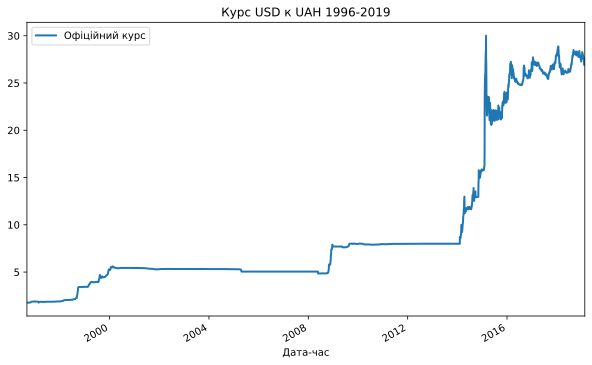

In [15]:
data.plot(title='Курс USD к UAH 1996-2019', linewidth=2)

In [16]:
data_2015 = data['2015-01-01':'2015-12-31']
data_2016 = data['2016-01-01':'2016-12-31']
data_2017 = data['2017-01-01':'2017-12-31']
data_2018 = data['2018-01-01':'2018-12-31']

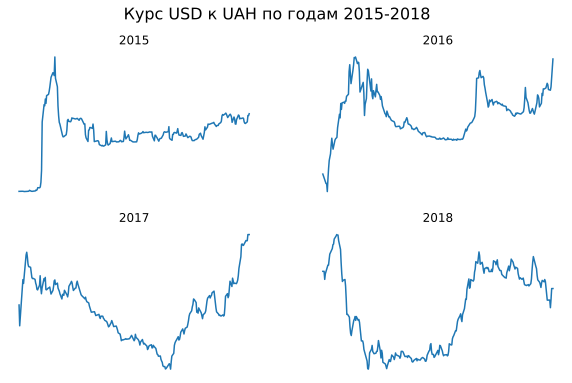

In [17]:
fig, axs = plt.subplots(2,2)

fig.suptitle('Курс USD к UAH по годам 2015-2018', fontsize=16)
# plt.xticks(rotation=45)



axs[0][0].set_title('2015')
axs[0][0].axis('off')
axs[0][0].plot(data_2015)
axs[0][0].xaxis.label.set_size(5)
axs[0][0].set_xticks


axs[0][1].set_title('2016')
axs[0][1].axis('off')
axs[0][1].plot(data_2016)
axs[0][1].xaxis.label.set_size(10)

axs[1][0].set_title('2017')
axs[1][0].axis('off')
axs[1][0].plot(data_2017)
axs[1][0].xaxis.label.set_size(10)

axs[1][1].set_title('2018')
axs[1][1].axis('off')
axs[1][1].plot(data_2018)
axs[1][1].xaxis.label.set_size(10)




### Среднее за год и разброс значений

In [18]:
data_2018.describe()

,Офіційний курс
count,253.000000
mean,27.217476
std,0.890464
min,25.915887
25%,26.270545
50%,27.245640
75%,28.061850
max,28.875837


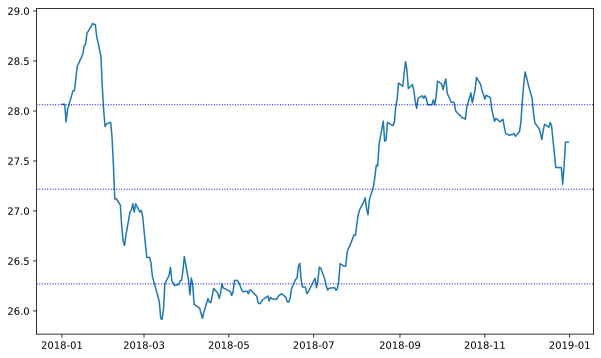

In [19]:
quantile_2018_25 = data_2018['Офіційний курс'].quantile(0.25)
quantile_2018_75 = data_2018['Офіційний курс'].quantile(0.75)
mean_2018 = data_2018['Офіційний курс'].mean()

plt.plot(data_2018)

plt.axhline(y=mean_2018, color='b', linestyle=':', linewidth=1)
plt.axhline(y=quantile_2018_25, color='b', linestyle=':', linewidth=1)
plt.axhline(y=quantile_2018_75, color='b', linestyle=':', linewidth=1)

## Скользящее среднее

Для "сглаживания" данных и поиска скрытых за шумом тенденций, воспользуемся оконными функциями.

Документация: [pandas.DataFrame.rolling](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html)

### Обыкновенное скользящее среднее

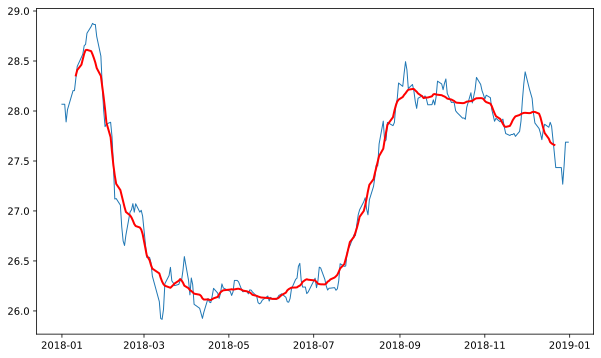

In [20]:
plt.plot(data_2018, linewidth=1)
plt.plot(data_2018.rolling(15).mean(center=True), color='red', linewidth=2)

Wikipedia: [Простое скользящее среднее]( https://ru.wikipedia.org/wiki/%D0%A1%D0%BA%D0%BE%D0%BB%D1%8C%D0%B7%D1%8F%D1%89%D0%B0%D1%8F_%D1%81%D1%80%D0%B5%D0%B4%D0%BD%D1%8F%D1%8F#%D0%9F%D1%80%D0%BE%D1%81%D1%82%D0%BE%D0%B5_%D1%81%D0%BA%D0%BE%D0%BB%D1%8C%D0%B7%D1%8F%D1%89%D0%B5%D0%B5_%D1%81%D1%80%D0%B5%D0%B4%D0%BD%D0%B5%D0%B5)

Документация: [pandas.core.window.Rolling.mean](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.Rolling.mean.html)

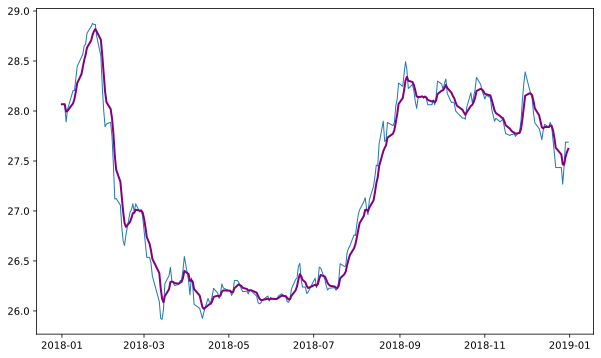

In [21]:
plt.plot(data_2018, linewidth=1)
plt.plot(data_2018.ewm(com=2).mean(), color='purple', linewidth=2)

Wikipedia: [Экспоненциально взвешенное скользящее среднее](  https://ru.wikipedia.org/wiki/%D0%A1%D0%BA%D0%BE%D0%BB%D1%8C%D0%B7%D1%8F%D1%89%D0%B0%D1%8F_%D1%81%D1%80%D0%B5%D0%B4%D0%BD%D1%8F%D1%8F#%D0%AD%D0%BA%D1%81%D0%BF%D0%BE%D0%BD%D0%B5%D0%BD%D1%86%D0%B8%D0%B0%D0%BB%D1%8C%D0%BD%D0%BE_%D0%B2%D0%B7%D0%B2%D0%B5%D1%88%D0%B5%D0%BD%D0%BD%D0%BE%D0%B5_%D1%81%D0%BA%D0%BE%D0%BB%D1%8C%D0%B7%D1%8F%D1%89%D0%B5%D0%B5_%D1%81%D1%80%D0%B5%D0%B4%D0%BD%D0%B5%D0%B5)

Документация: [pandas.DataFrame.ewm](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html)

## Дополнение

### Используем Plotly

https://github.com/plotly/plotly.py

In [29]:
import plotly.graph_objs as go
import plotly.offline

In [30]:
graph = [go.Scatter(x=data_2018.index, y=data_2018['Офіційний курс'], name='USD')]
graph.append(go.Scatter(x=data_2018.index, y=data_2018['Офіційний курс'].rolling(20).mean(center=True), name='SMA~20'))
graph.append(go.Scatter(x=data_2018.index, y=data_2018['Офіційний курс'].ewm(com=1).mean(), name='EMA~1'))
graph.append(go.Scatter(x=data_2018.index, y=data_2018['Офіційний курс'].ewm(com=2).mean(), name='EMA~2'))
graph.append(go.Scatter(x=data_2018.index, y=data_2018['Офіційний курс'].ewm(com=10).mean(), name='EMA~10'))


plotly.offline.plot(graph, filename='plotly-time-series.html')

'plotly-time-series.html'